<a href="https://colab.research.google.com/github/smesindianou/homeworks/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Δεν χρησιμοποιήθηκαν όλα τα αποτελέσματα αυτού του notebook, αλλά αποτελεί κομμάτι της συνολικής έρευνας δεδομένων.`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import spacy
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# !python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ΓΥΝΑΙΚΟΚΤΟΝΙΑ_Ε_P/all/all_mme_data.csv')
g_data = pd.read_csv('/content/drive/MyDrive/ΓΥΝΑΙΚΟΚΤΟΝΙΑ_Ε_P/all/g_trends_data.csv')

In [ ]:
print(data.columns)
print(g_data.columns)

Index(['date', 'text', 'section', 'Μέσο'], dtype='object')
Index(['Hμερομηνία', 'Eνδιαφέρον'], dtype='object')


In [ ]:
data['Μέσο'].unique()

array(['Athens Voice', 'Το ΒΗΜΑ', 'The Toc', 'Καθημερινή', 'Ναυτεμπορική'],
      dtype=object)

Πότε εμφανίζεται ο όρος γυναικοκτονία σε κάθε μέσο για πρώτη φορά;

In [ ]:
# Για κάθε μέσο, βρίσκουμε την πρώτη εμφάνιση με βάση έτος και μήνα

first_appearance_per_media = data.groupby('Μέσο').apply(
    lambda x: x.sort_values(['date']).iloc[0]
).reset_index(drop=True)

# Επιλέγουμε μόνο τις στήλες που μας ενδιαφέρουν

first_appearance_per_media = first_appearance_per_media[['Μέσο', 'date']]

print(first_appearance_per_media)

           Μέσο        date
0  Athens Voice  2018-12-14
1       The Toc  2018-11-24
2    Καθημερινή  2021-07-30
3  Ναυτεμπορική  2021-07-18
4       Το ΒΗΜΑ  2022-06-24


/tmp/ipython-input-11-2337426440.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  first_appearance_per_media = data.groupby('Μέσο').apply(


Πλήθος άρθρων με τον όρο "γυναικοκτονία" ανά μήνα και μέσο 2018-2025.

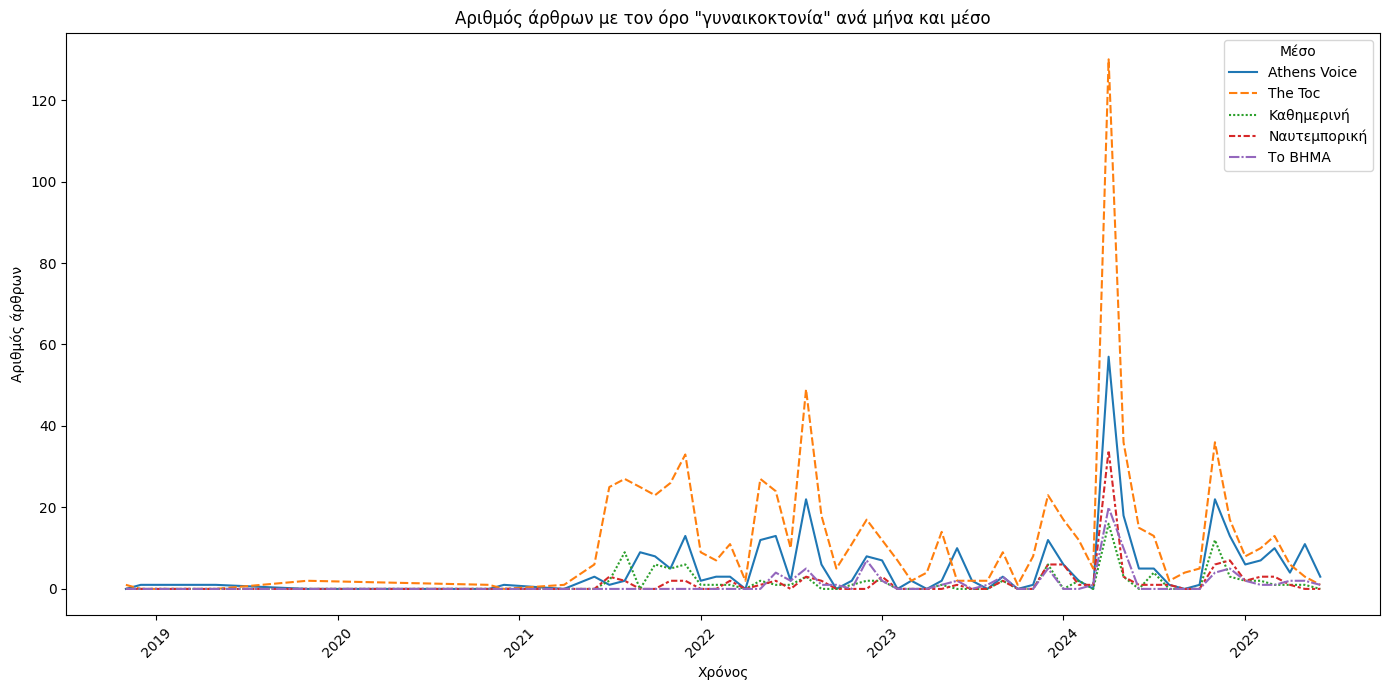

In [ ]:
data['date'] = pd.to_datetime(data['date'])

data['year_month'] = data['date'].dt.to_period('M')

# Ομαδοποιούμε και μετράμε άρθρα ανά μέσο και μήνα
counts = data.groupby(['year_month', 'Μέσο']).size().reset_index(name='άρθρα')

# Pivot για να έχουμε μέσα σε στήλες (κάθε μέσο)
counts_pivot = counts.pivot(index='year_month', columns='Μέσο', values='άρθρα').fillna(0)

# Convert the PeriodIndex to DatetimeIndex for plotting
counts_pivot.index = counts_pivot.index.to_timestamp()

# Γράφημα γραμμών με seaborn/matplotlib
plt.figure(figsize=(14,7))
sns.lineplot(data=counts_pivot)
plt.title('Αριθμός άρθρων με τον όρο "γυναικοκτονία" ανά μήνα και μέσο')
plt.xlabel('Χρόνος')
plt.ylabel('Αριθμός άρθρων')
plt.legend(title='Μέσο')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ανά έτος

In [ ]:
month_counts_df = data['year'].value_counts().reset_index()
month_counts_df.columns = ['year', 'articles_count']
fig = px.bar(month_counts_df, x='year', y="articles_count",
             labels={'year':'έτος', 'articles_count':'πλήθος άρθρων'}, text_auto=True)
fig.show()

G_trends γράφημα

In [ ]:
g_data

,Hμερομηνία,Eνδιαφέρον
0,2025-06-01,2
1,2025-05-01,0
2,2025-04-01,0
3,2025-03-01,23
4,2025-02-01,19
...,...,...
253,2004-05-01,0
254,2004-04-01,0
255,2004-03-01,0
256,2004-02-01,0


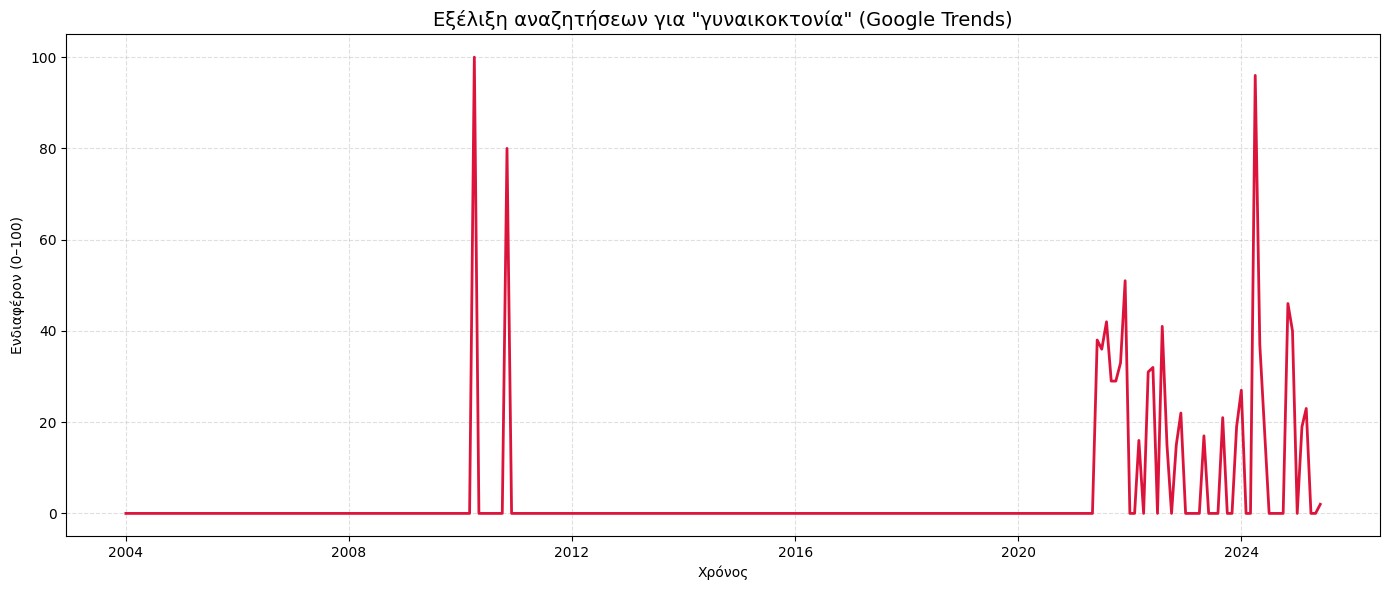

In [ ]:
g_data['Hμερομηνία'] = pd.to_datetime(g_data['Hμερομηνία'])

# Ταξινόμηση για σωστή σειρά
g_data = g_data.sort_values('Hμερομηνία')

# Γράφημα
plt.figure(figsize=(14, 6))
plt.plot(g_data['Hμερομηνία'], g_data['Eνδιαφέρον'], color='crimson', linewidth=2)
plt.title('Εξέλιξη αναζητήσεων για "γυναικοκτονία" (Google Trends)', fontsize=14)
plt.xlabel('Χρόνος')
plt.ylabel('Ενδιαφέρον (0–100)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

WORDCLOUDS

functions

In [ ]:
# function δημιουργίας wordcloud
def create_wordcloud(text):
  wordcloud = WordCloud(
      stopwords = nlp.Defaults.stop_words, # <- τα stopwords που θέλουμε να "κοπούν"
      width = 2000,
      height = 1000,
      background_color = 'black'
  ).generate(text) # <- μέσα στην παρένθεση βάζουμε το όνομα της μεταβλητής που έχουμε βάλει στα arguements που δέχεται το function
  return wordcloud

In [ ]:
# function δημιουργίας της εικόνας του wordcloud
def create_wordcloud_img(text):
  wordcloud = create_wordcloud(text) # δημιουργία του wordcloud με το παραπάνω function
  # δημιουργία της εικόνας του wordcloud
  fig = plt.figure(
      figsize = (40, 30),
      facecolor = 'k',
      edgecolor = 'k')
  return plt.imshow(wordcloud)

In [ ]:
custom_stopwords = ['σύμφωνα', 'thetoc', 'gr', 'αναργύρων', 'είπε', 'συμβαίνει', 'ό', 'γυναίκο','αστυνομικός','γυναικοκτονία', 'γυναίκα', 'ανάργυρος', 'άγιος', 'αγίων', 'λέγω', 'αναφέρω', 'κάνω', 'μπορώ', 'Κυριακή', 'ελ', 'καλώ', 'πρόσφατες', 'ειδήσεις', 'διαβάστε', 'περισσότερα', 'γίνομαι', 'αναργύρος', 'αστυνομία', 'άμεσος', 'Ελλάδα', 'συμβαίνω', 'υπάρχω']

for word in custom_stopwords:
  if word not in nlp.Defaults.stop_words:
    nlp.Defaults.stop_words.add(word)
    lex_attr = nlp.vocab[word]
    lex_attr.is_stop = True

λημματοποίηση

In [ ]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['date'] = data['date'].dt.date

In [ ]:
articles_text_24 = data[data['year']==2024]['text'].str.cat(sep = ' ')

In [ ]:
# όλα πεζά
articles_text_24_lower = articles_text_24.lower()

In [ ]:
articles_text_24_lower = articles_text_24_lower.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').replace('ενδοοικογενειακός', 'ενδοοικογενειακή')

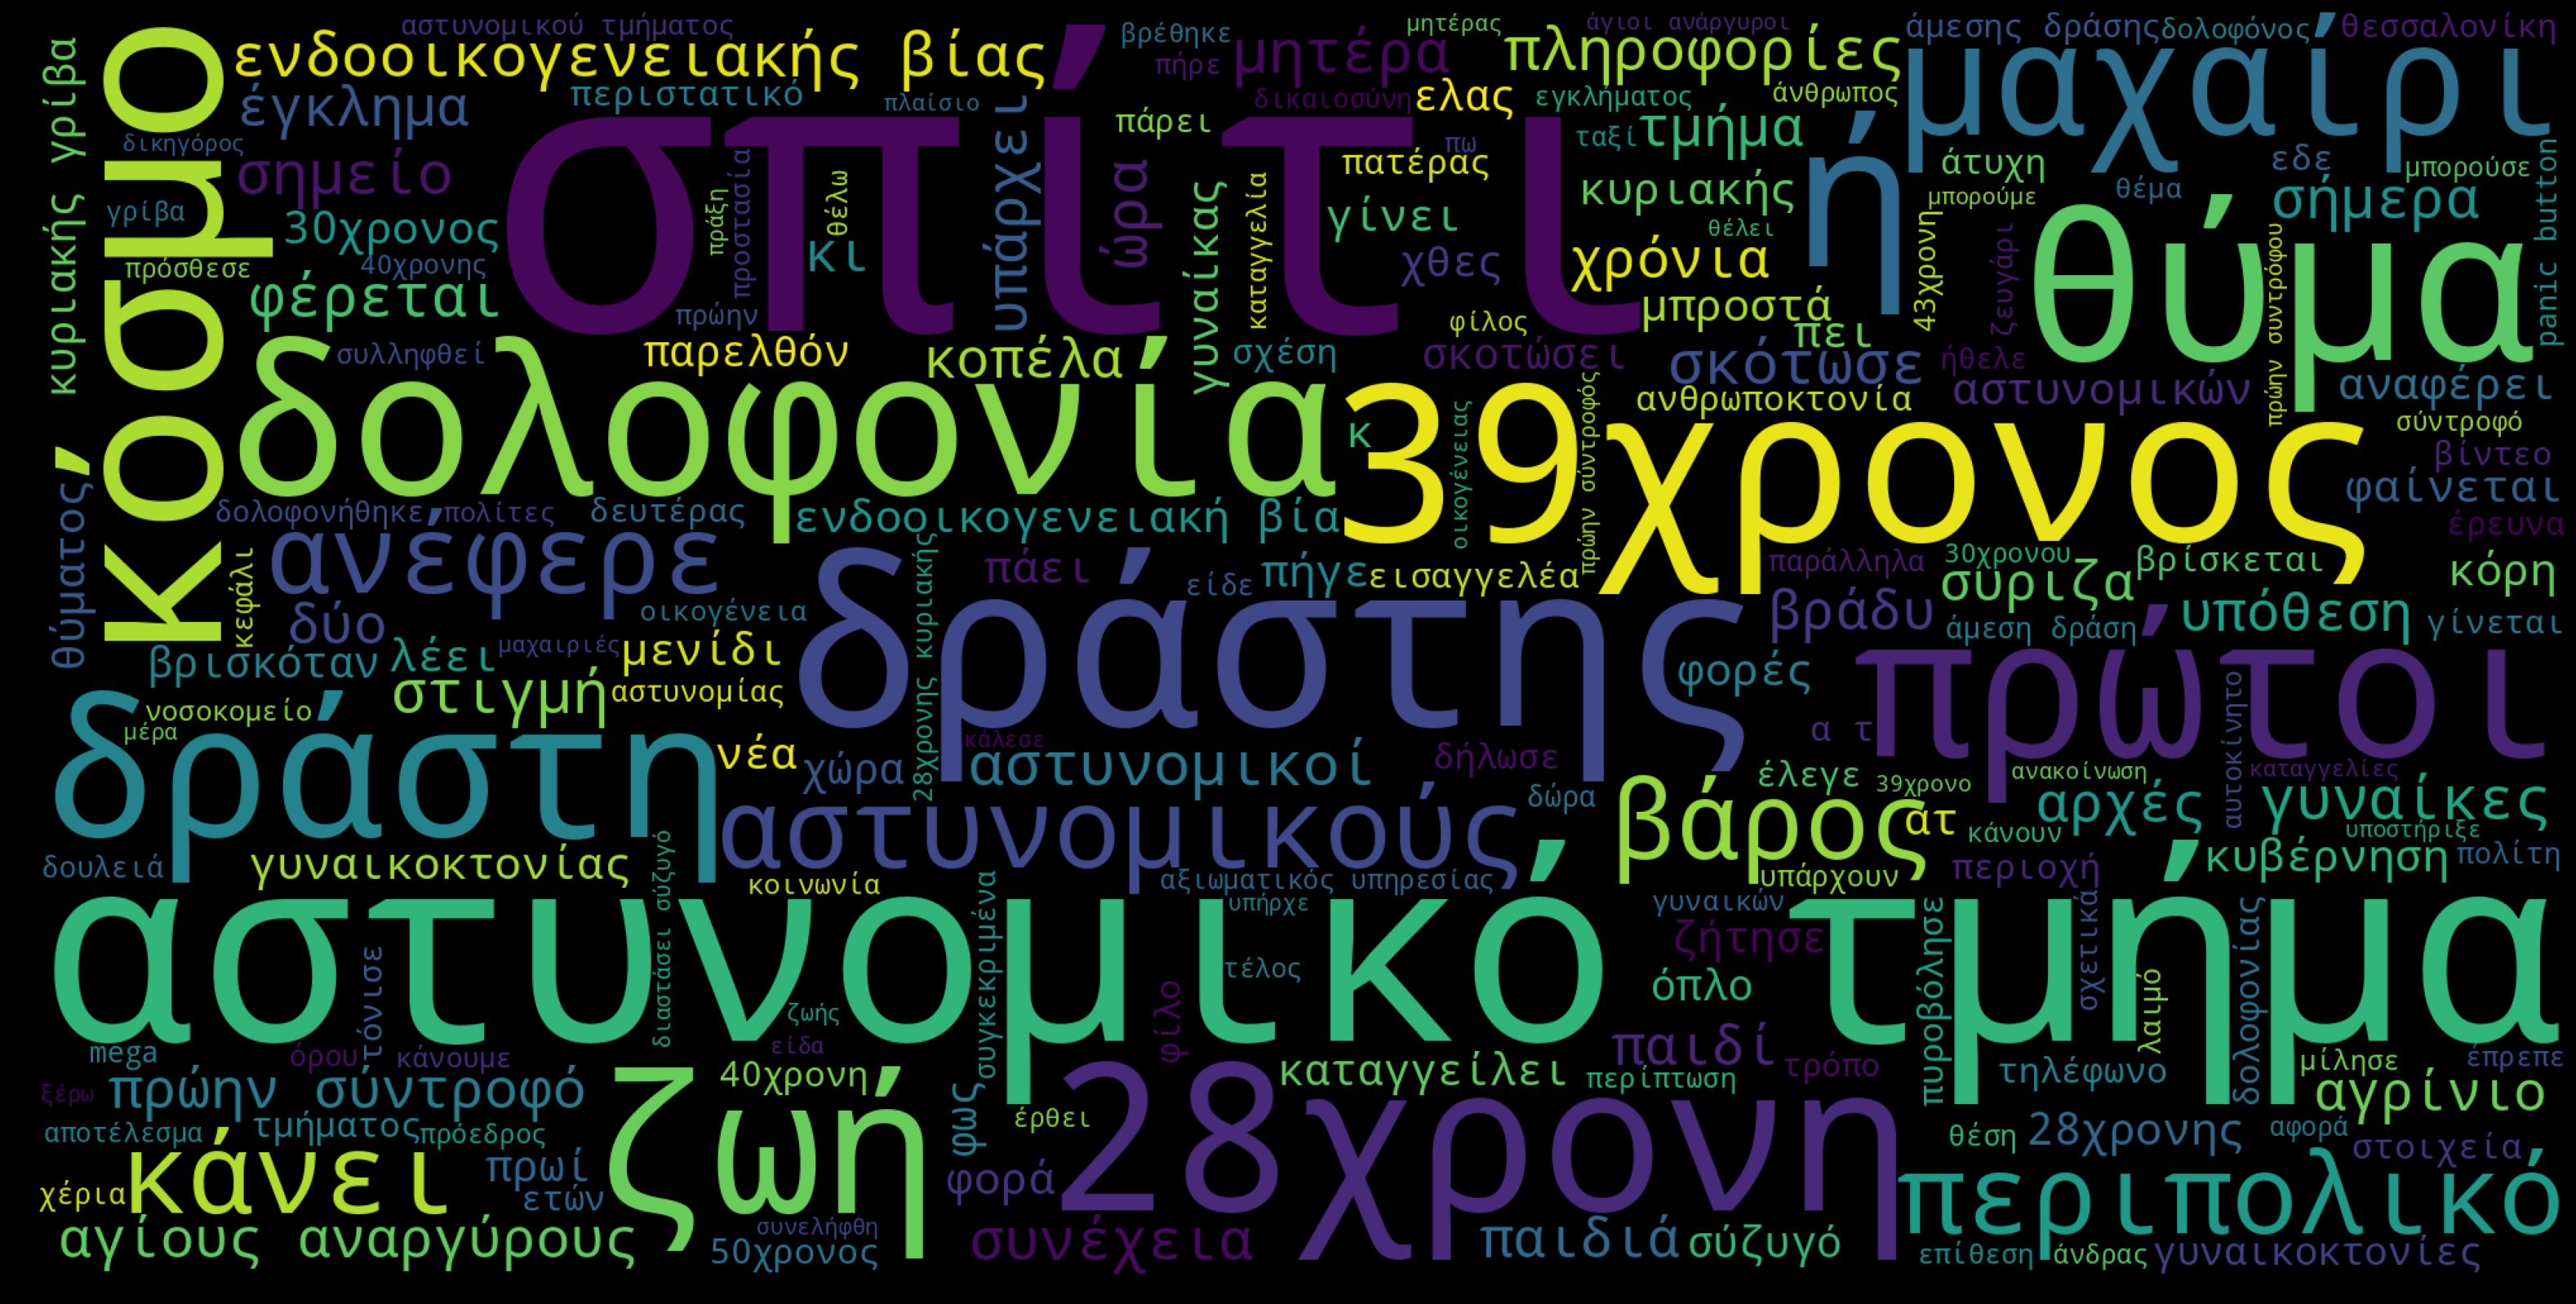

In [ ]:
create_wordcloud_img(articles_text_24_lower)

In [ ]:
# data.to_csv('/content/drive/MyDrive/ΓΥΝΑΙΚΟΚΤΟΝΙΑ_Ε_P/all.csv', index = False)

In [ ]:
# pd.read_csv('/content/drive/MyDrive/ΓΥΝΑΙΚΟΚΤΟΝΙΑ_Ε_P/all.csv')

Ανά κατηγορία

In [ ]:
data['section'].unique()

array(['Κοινωνια', 'Κοινωνία', 'Ελλάδα', 'Ελλαδα', 'Πολιτική', 'Opinion',
       'Αστυνομικό', 'Δικαστικό', 'Πολιτικη & Οικονομια', 'Γνώμες',
       'Δικαιοσύνη', 'Κύπρος',
       'Αφιερώματα                \\THE N SOCIETY', 'Απόψεις',
       'Αγιοι Ανάργυροι', 'ΕΙΚΟΝΕΣ', 'Οικονομία', 'Πολιτισμος',
       'Αθλητισμος', 'Trending Now', 'Life'], dtype=object)

In [ ]:
data['section'] = data['section'].replace({
    'Κοινωνια': 'Κοινωνία',
    'Ελλαδα': 'Ελλάδα',
    'Opinion': 'Απόψεις',
    'Γνώμες': 'Απόψεις',
    'Αφιερώματα                \\THE N SOCIETY': 'Αφιερώματα',
    'Πολιτική': 'Πολιτικη & Οικονομια',
    'Οικονομία': 'Πολιτικη & Οικονομια'
})

In [ ]:
data['section'].unique()

array(['Κοινωνία', 'Ελλάδα', 'Πολιτικη & Οικονομια', 'Απόψεις',
       'Αστυνομικό', 'Δικαστικό', 'Δικαιοσύνη', 'Κύπρος', 'Αφιερώματα',
       'Αγιοι Ανάργυροι', 'ΕΙΚΟΝΕΣ', 'Πολιτισμος', 'Αθλητισμος',
       'Trending Now', 'Life'], dtype=object)

`οι αλλαγές που έγιναν στο df μου σε αυτό το στάδιο, αποθηκεύτηκαν τελικά παρακάτω`

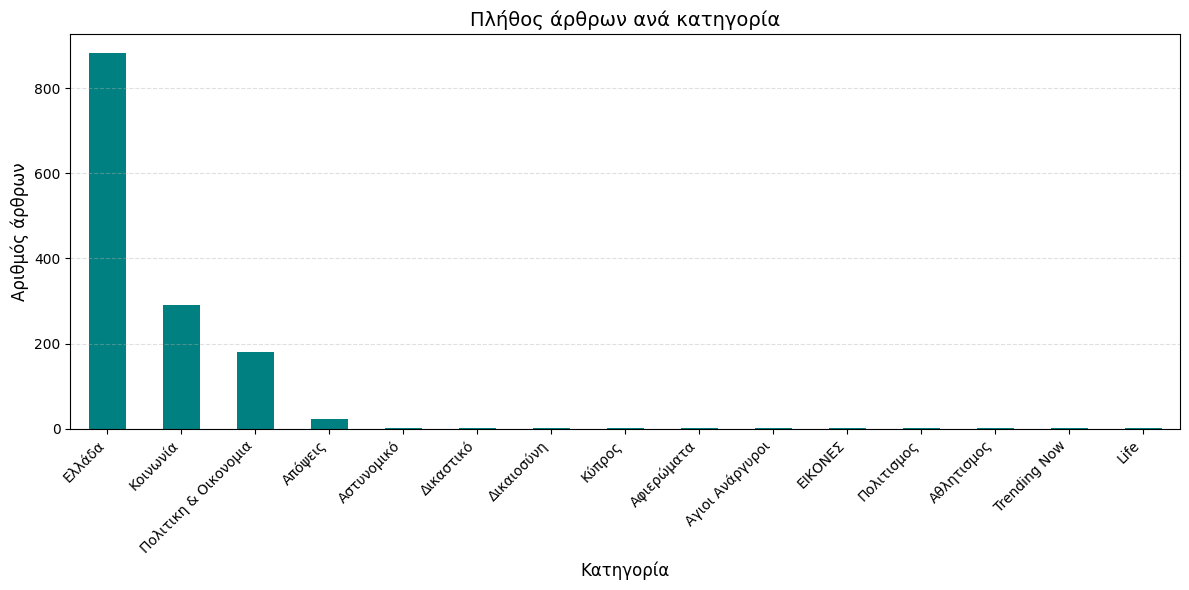

In [ ]:
# Ομαδοποίηση και καταμέτρηση
category_counts = data['section'].value_counts()

# Γράφημα
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='teal')

plt.title("Πλήθος άρθρων ανά κατηγορία", fontsize=14)
plt.xlabel("Κατηγορία", fontsize=12)
plt.ylabel("Αριθμός άρθρων", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

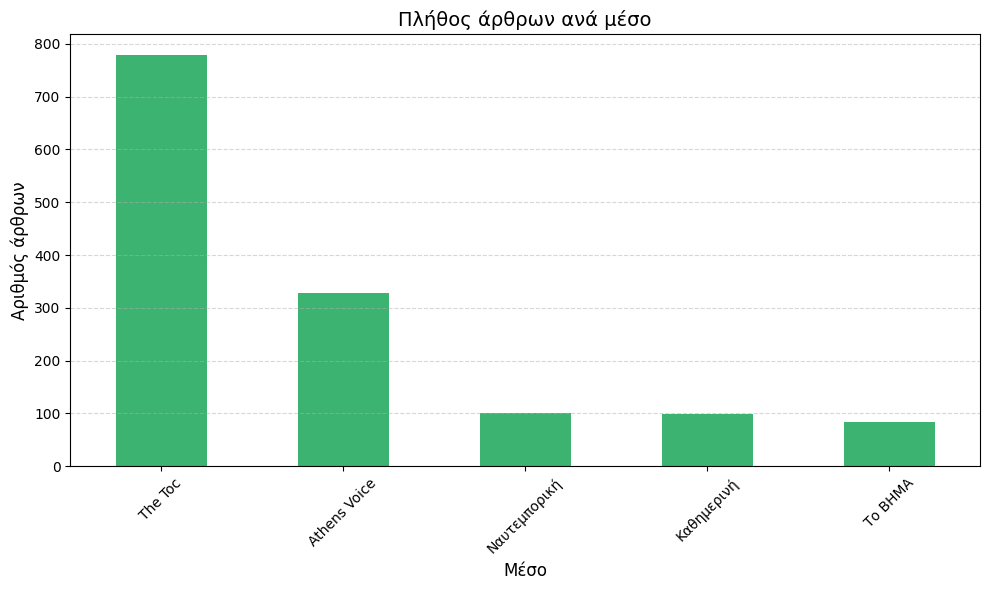

In [ ]:
media_counts = data['Μέσο'].value_counts()

# Γράφημα
plt.figure(figsize=(10, 6))
media_counts.plot(kind='bar', color='mediumseagreen')

plt.title('Πλήθος άρθρων ανά μέσο', fontsize=14)
plt.xlabel('Μέσο', fontsize=12)
plt.ylabel('Αριθμός άρθρων', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Axes: xlabel='Μέσο'>

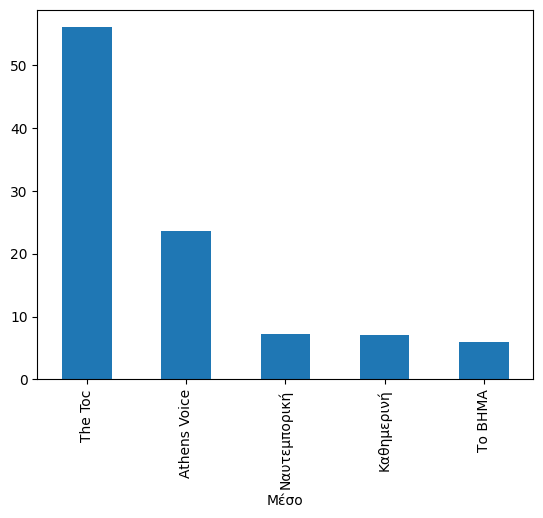

In [ ]:
(data['Μέσο'].value_counts(normalize=True) * 100).plot(kind='bar')

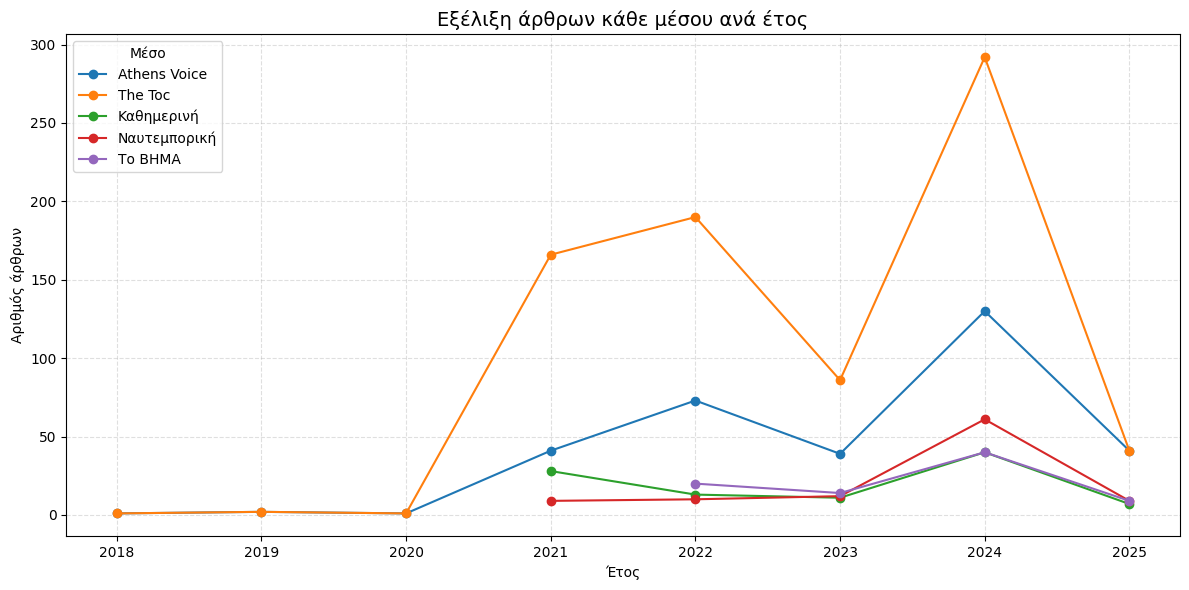

In [ ]:

df_grouped = data.groupby(['year', 'Μέσο']).size().unstack()

df_grouped.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Εξέλιξη άρθρων κάθε μέσου ανά έτος', fontsize=14)
plt.xlabel('Έτος')
plt.ylabel('Αριθμός άρθρων')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
data.to_csv('/content/drive/MyDrive/ΓΥΝΑΙΚΟΚΤΟΝΙΑ_Ε_P/all/all_data.csv', index = False)